In [1]:
import numpy as np

X_train_1 = np.load('X_train_1.npy')
y_train_1 = np.load('y_train_1.npy')
X_test_1 = np.load('X_test_1.npy')
y_test_1 = np.load('y_test_1.npy')

X_train_2 = np.load('X_train_2.npy')
y_train_2 = np.load('y_train_2.npy')
X_test_2 = np.load('X_test_2.npy')
y_test_2 = np.load('y_test_2.npy')
print("Data loaded successfully.")

Data loaded successfully.


In [2]:
w_1_ols = np.linalg.inv(X_train_1.T @ X_train_1) @ X_train_1.T @ y_train_1
w_2_ols = np.linalg.inv(X_train_2.T @ X_train_2) @ X_train_2.T @ y_train_2
np.savetxt('w_ols_23882.csv', w_2_ols, delimiter=",")
print(w_1_ols)
print(w_1_ols.shape)
print(w_2_ols.shape)

[[0.35792502]
 [0.17620732]
 [0.07327961]
 [0.09745096]
 [0.3128559 ]]
(5, 1)
(100, 1)


In [3]:
def ridge_regression(X_train, y_train, lamda):
    n_features = X_train.shape[1]
    w_rr = np.linalg.inv(X_train.T @ X_train + lamda * np.eye(n_features)) @ X_train.T @ y_train
    return w_rr

w_1_rr = ridge_regression(X_train_1, y_train_1, 1)
w_2_rr = ridge_regression(X_train_2, y_train_2, 1)
print(w_1_rr)
np.savetxt('w_rr_23882.csv', w_2_rr, delimiter=",")


[[0.3435628 ]
 [0.17102501]
 [0.06478499]
 [0.09936626]
 [0.28823291]]


In [30]:
import numpy as np

print('Variance of y_train_1:', np.var(y_train_1))
print('Variance of y_train_2:', np.var(y_train_2))

ols_y_pred_train_1 = X_train_1 @ w_1_ols
ols_y_pred_train_2 = X_train_2 @ w_2_ols

rr_y_pred_train_1 = X_train_1 @ w_1_rr
rr_y_pred_train_2 = X_train_2 @ w_2_rr

ols_train_mse_1 = np.mean((y_train_1 - ols_y_pred_train_1) ** 2)
ols_train_mse_2 = np.mean((y_train_2 - ols_y_pred_train_2) ** 2)

rr_train_mse_1 = np.mean((y_train_1 - rr_y_pred_train_1) ** 2)
rr_train_mse_2 = np.mean((y_train_2 - rr_y_pred_train_2) ** 2)

print('OLS Train MSE 1:', ols_train_mse_1)
print('OLS Train MSE 2:', ols_train_mse_2)

print('RR Train MSE 1:', rr_train_mse_1)
print('RR Train MSE 2:', rr_train_mse_2)

Variance of y_train_1: 0.3403299134280129
Variance of y_train_2: 42.27487640626974
OLS Train MSE 1: 0.023603962469695285
OLS Train MSE 2: 251897.09204790968
RR Train MSE 1: 0.02426785213209582
RR Train MSE 2: 0.006723022187564108


In [31]:
print('Variance of y_test_1:', np.var(y_test_1))
print('Variance of y_test_2:', np.var(y_test_2))

ols_y_pred_test_1 = X_test_1 @ w_1_ols
ols_y_pred_test_2 = X_test_2 @ w_2_ols

rr_y_pred_test_1 = X_test_1 @ w_1_rr
rr_y_pred_test_2 = X_test_2 @ w_2_rr

ols_test_mse_1 = np.mean((y_test_1 - ols_y_pred_test_1) ** 2)
ols_test_mse_2 = np.mean((y_test_2 - ols_y_pred_test_2) ** 2)

rr_test_mse_1 = np.mean((y_test_1 - rr_y_pred_test_1) ** 2)
rr_test_mse_2 = np.mean((y_test_2 - rr_y_pred_test_2) ** 2)

print('OLS Test MSE 1:', ols_test_mse_1)
print('OLS Test MSE 2:', ols_test_mse_2)

print('RR Test MSE 1:', rr_test_mse_1)
print('RR Test MSE 2:', rr_test_mse_2)

Variance of y_test_1: 0.38437613416630045
Variance of y_test_2: 48.94737660449026
OLS Test MSE 1: 0.06482834575163067
OLS Test MSE 2: 15642797.52895933
RR Test MSE 1: 0.07358010450145122
RR Test MSE 2: 23.65588229970076


In [2]:
# Extract the closing price of the stock and normalize it
import pandas as pd
import numpy as np

BA_stock_data = pd.read_csv('BA.csv')
BA_stock_closing_prices = BA_stock_data['Close'].values
BA_stock_closing_prices = np.array(BA_stock_closing_prices, dtype=np.float64)
mean_stock_closing_prices = np.mean(BA_stock_closing_prices)
std_stock_closing_prices = np.std(BA_stock_closing_prices)
BA_stock_closing_prices_normalized = (BA_stock_closing_prices - mean_stock_closing_prices) / std_stock_closing_prices
print(BA_stock_closing_prices_normalized.shape)



(1258,)


In [3]:
t = [7, 30, 90]
X_data_list = []
labels_data_list = []

for i in t:
    N = len(BA_stock_closing_prices_normalized)
    
    X_data = np.zeros((N - i, i))
    labels_data = np.zeros(N - i)
    for j in range(N - i):
        X_data[j] = BA_stock_closing_prices_normalized[j:j + i]
        labels_data[j] = BA_stock_closing_prices_normalized[j + i]
        
    X_data = np.array(X_data)
    labels_data = np.array(labels_data)
    
    X_data_list.append(X_data)
    labels_data_list.append(labels_data)

X_train_list, y_train_list, X_test_list, y_test_list = [], [], [], []

for i in range(len(t)):
    split_index = int(0.5 * X_data_list[i].shape[0])
    
    X_train, X_test = X_data_list[i][:split_index], X_data_list[i][split_index:]
    y_train, y_test = labels_data_list[i][:split_index], labels_data_list[i][split_index:]
    
    X_train_list.append(X_train)
    y_train_list.append(y_train)
    X_test_list.append(X_test)
    y_test_list.append(y_test)

    print(f"t={t[i]}: X_train {X_train.shape}, y_train {y_train.shape}, X_test {X_test.shape}, y_test {y_test.shape}")


t=7: X_train (625, 7), y_train (625,), X_test (626, 7), y_test (626,)
t=30: X_train (614, 30), y_train (614,), X_test (614, 30), y_test (614,)
t=90: X_train (584, 90), y_train (584,), X_test (584, 90), y_test (584,)


In [4]:
from cvxopt import matrix, solvers
import numpy as np

def linear_kernel(x1, x2, gamma=1.0):
    return np.dot(x1, x2.T)


def solve_svr_dual(X_train, y_train, C = 1.0, epsilon = 0.1, kernel = linear_kernel, gamma = 1.0):
    n_samples = X_train.shape[0]
    # We have 2n samples, so the kernel matrix will be of size 2n x 2n
    # alpha_i >= 0 for i = 1, 2, ..., n
    # alpha_i* >= 0 for i = 1, 2, ..., n
    
    if kernel == linear_kernel:
        K = kernel(X_train, X_train, gamma)
    else:
        K = np.array([[kernel(x1, x2, gamma) for x2 in X_train] for x1 in X_train])

    P = np.vstack([
        np.hstack([K, -K]),
        np.hstack([-K, K])
    ])
    P = matrix(P)
    
    # Linear Term: q_i = epsilon - y_i for alphai
    # Linear Term: q_i = epsilon + y_i for alphai*
    q = np.hstack([epsilon - y_train, epsilon + y_train])
    q = matrix(q, (2 * n_samples, 1), 'd')
    
    # Inequality Constraints: 0 <= alpha_i <= C for i = 1, 2, ..., n
    # Inequality Constraints: 0 <= alpha_i* <= C for i = 1, 2, ..., n
    G = np.vstack([-np.eye(2 * n_samples), np.eye(2 * n_samples)])
    h = np.hstack([np.zeros(2 * n_samples), C * np.ones(2 * n_samples)])
    G = matrix(G)
    h = matrix(h)
    
    # Equality Constraints: Σ_i (alpha_i - alpha_i*) = 0 for bias term b
    A = np.hstack([np.ones(n_samples), -np.ones(n_samples)]).reshape(1,-1)
    A = matrix(A, (1, 2 * n_samples))
    b = matrix(0.0)
    
    solvers.options['show_progress'] = False
 
    
    solution = solvers.qp(P, q, G, h, A, b)
    return solution
    
   
C = 1.0
epsilon = 0.1
svr_dual_solutions = []
w_dual_solutions = []
b_dual_solutions = []
ξ_dual_solutions = []

for i in range(len(t)):
    svr_dual_solution = solve_svr_dual(X_train_list[i], y_train_list[i], C = C, epsilon = epsilon)
    svr_dual_solutions.append(svr_dual_solution)
    
    α = np.array(svr_dual_solution['x']).flatten()
    n_samples = X_train_list[i].shape[0]
    
    α_plus = α[:n_samples]
    α_minus = α[n_samples:]
    
    α_diff = α_plus - α_minus
    
    # w = Σ_i (α_i - α_i*) * x_i
    w = np.dot(α_diff, X_train_list[i])
    w_dual_solutions.append(w)
    
    support_vector_indices = np.where(
            ((α_plus > 1e-5) & (α_plus < C - 1e-5)) | 
            ((α_minus > 1e-5) & (α_minus < C - 1e-5)))[0] 
    
    support_vectors = X_train_list[i][support_vector_indices]
    support_vector_labels = y_train_list[i][support_vector_indices]
    
    # b = y_i - w^T * x_i for some support vector x_i and then we take the mean
    b_values = support_vector_labels - np.dot(support_vectors, w)
    b = np.mean(b_values)
    b_dual_solutions.append(b)
    
    ξ_dual = np.maximum(0, np.abs(y_train_list[i] - np.dot(w, X_train_list[i].T) - b) - epsilon)
    ξ_dual_solutions.append(ξ_dual)
    
    print(f"t={t[i]}: Number of support vectors: {len(support_vector_indices)}")
    print(f"t={t[i]}: Mean ξ: {np.mean(ξ_dual)}")
    print(f"t={t[i]}: Mean α+: {np.mean(α_plus)}")
    print(f"t={t[i]}: Mean α-: {np.mean(α_minus)}")
    print(f"t={t[i]}: Mean w: {np.mean(w)}")
    print(f"t={t[i]}: Mean b: {b}")
    print("\n")


    

t=7: Number of support vectors: 7
t=7: Mean ξ: 0.0016272794147845168
t=7: Mean α+: 0.01606295309135212
t=7: Mean α-: 0.016062953091352097
t=7: Mean w: 0.14179357883709046
t=7: Mean b: 0.018476091065151006


t=30: Number of support vectors: 18
t=30: Mean ξ: 0.001708370521415161
t=30: Mean α+: 0.01689390696708512
t=30: Mean α-: 0.01689390696708512
t=30: Mean w: 0.03281888469336625
t=30: Mean b: 0.01699458659772506


t=90: Number of support vectors: 45
t=90: Mean ξ: 0.0012963228266894007
t=90: Mean α+: 0.019284827077998615
t=90: Mean α-: 0.019284827077998633
t=90: Mean w: 0.01100417457879897
t=90: Mean b: -0.011901831233790612




In [5]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def epsilon_insensitive_loss(y_true, y_pred, epsilon):
    loss = np.maximum(0, np.abs(y_true - y_pred) - epsilon)
    return np.mean(loss)

for i in range(len(t)):
    y_pred_train = np.dot(X_train_list[i], w_dual_solutions[i]) + b_dual_solutions[i]
    y_pred_test = np.dot(X_test_list[i], w_dual_solutions[i]) + b_dual_solutions[i]
    
    train_mse = mean_squared_error(y_train_list[i], y_pred_train)
    test_mse = mean_squared_error(y_test_list[i], y_pred_test)
    
    train_epsilon_insensitive_loss = epsilon_insensitive_loss(y_train_list[i], y_pred_train, epsilon)
    test_epsilon_insensitive_loss = epsilon_insensitive_loss(y_test_list[i], y_pred_test, epsilon)
    
    print(f"t={t[i]}: Train MSE: {train_mse}")
    print(f"t={t[i]}: Test MSE: {test_mse}")
    print(f"t={t[i]}: Train Epsilon Insensitive Loss: {train_epsilon_insensitive_loss}")
    print(f"t={t[i]}: Test Epsilon Insensitive Loss: {test_epsilon_insensitive_loss}")
    print("\n")


t=7: Train MSE: 0.0025652169426667185
t=7: Test MSE: 0.004640035499245199
t=7: Train Epsilon Insensitive Loss: 0.0016272794147845161
t=7: Test Epsilon Insensitive Loss: 0.005120385922086317


t=30: Train MSE: 0.00289679153729364
t=30: Test MSE: 0.005277599637617938
t=30: Train Epsilon Insensitive Loss: 0.001708370521415161
t=30: Test Epsilon Insensitive Loss: 0.006294053764336682


t=90: Train MSE: 0.0030750536279225216
t=90: Test MSE: 0.007141323778142347
t=90: Train Epsilon Insensitive Loss: 0.0012963228266894007
t=90: Test Epsilon Insensitive Loss: 0.009488189557790508




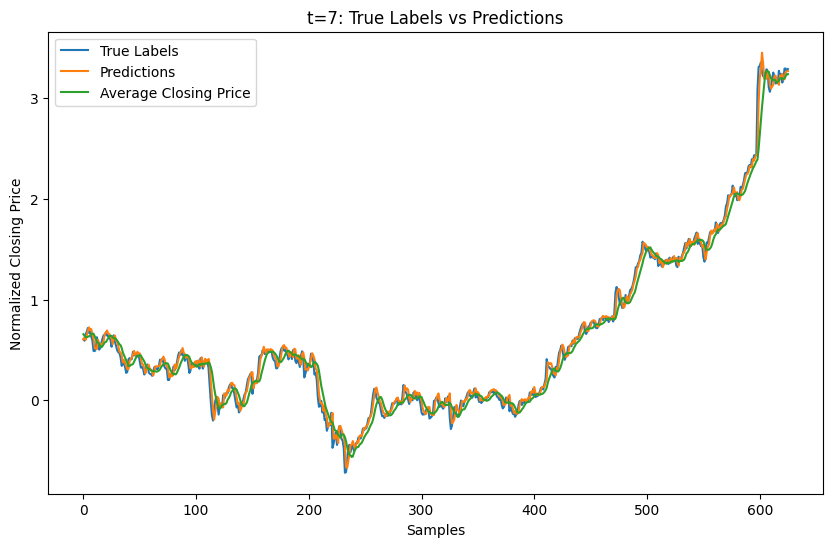

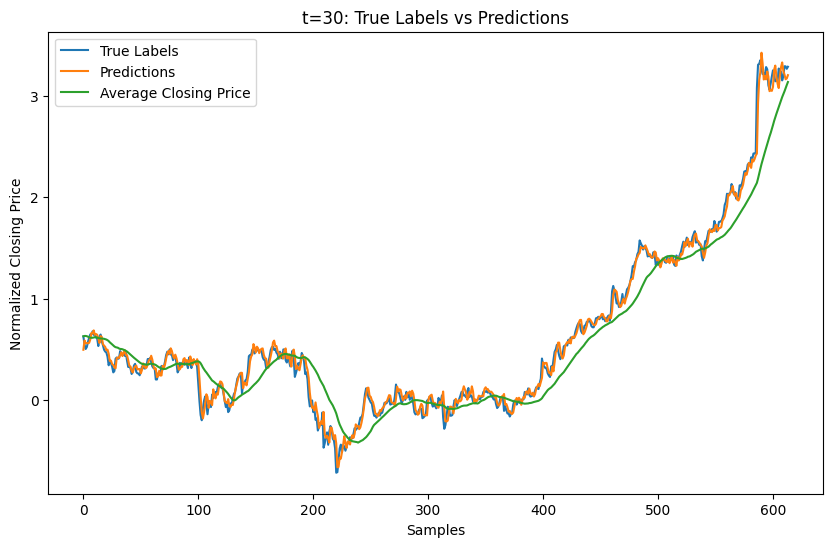

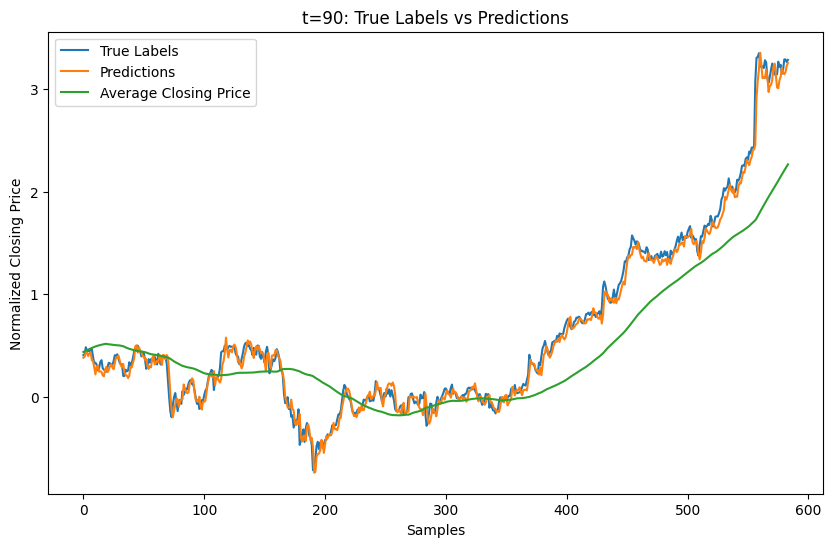

In [6]:
# Plot the predictions on the test set, the true labels and the average closing price of last t days
import matplotlib.pyplot as plt

for i in range(len(t)):
    y_pred_test = np.dot(X_test_list[i], w_dual_solutions[i]) + b_dual_solutions[i]
    plt.figure(figsize=(10, 6))
    plt.plot(y_test_list[i], label='True Labels')
    plt.plot(y_pred_test, label='Predictions')
    plt.plot(np.mean(X_test_list[i], axis=1), label='Average Closing Price')
    plt.xlabel('Samples')
    plt.ylabel('Normalized Closing Price')
    plt.title(f"t={t[i]}: True Labels vs Predictions")
    plt.legend()
    plt.show()


In [ ]:
from itertools import product
import matplotlib.pyplot as plt
def rbf_kernel(x, y, gamma = 0.1):
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)

gamma_values = [1, 0.1, 0.01, 0.001]

def svm_gaussian_predictor(α_plus, α_minus, train_features, train_labels, b, gamma, X_test):
    α_diff = (α_plus - α_minus)
    
    predictions = []
    for x in X_test:
        prediction = b
        kernel_values = np.array([rbf_kernel(x, train_features[j], gamma) for j in range(len(train_features))])
        prediction += np.sum(α_diff * kernel_values) # Compute Σ(α_i - α_i*) K(x_i, x)
        predictions.append(prediction)
    
    return np.array(predictions)

def compute_gaussian_b(α_plus, α_minus, train_features, train_labels, gamma):
    α_diff = (α_plus - α_minus)

    b_values = []
    for i in range(len(train_features)):
        b_i = train_labels[i]
        kernel_values = np.array([rbf_kernel(train_features[i], train_features[j], gamma) for j in range(len(train_features))])
        b_i -= np.sum(α_diff * kernel_values)
        b_values.append(b_i)
    
    return np.mean(b_values)


    

# Find best C and epsilon using grid search
C_values = [0.01, 0.1, 1, 10, 100]
epsilon_values = [0.001, 0.01, 0.1, 0.5, 1]
best_C = None
best_epsilon = None
best_epsilon_insensitive_loss = float('inf')

train_data = X_train_list[2]
train_labels = y_train_list[2]
test_data = X_test_list[2]
test_labels = y_test_list[2]

pairwise_sq_dist = np.array([[np.sum((x1 - x2) ** 2) for x2 in train_data] for x1 in train_data])
median = np.median(pairwise_sq_dist)
gamma = 1 / (2 * median)



for C, epsilon in product(C_values, epsilon_values):
    
    print(f"Testing C={C}, epsilon={epsilon}")
    svr_dual_solution = solve_svr_dual(train_data, train_labels, C=C, epsilon=epsilon, kernel=rbf_kernel, gamma=gamma)
    α = np.array(svr_dual_solution['x']).flatten()
    α_plus = α[:train_data.shape[0]]
    α_minus = α[train_data.shape[0]:]
        
    b = compute_gaussian_b(α_plus, α_minus, train_data, train_labels, gamma= gamma)
        
    y_pred_test = svm_gaussian_predictor(α_plus, α_minus, train_data, train_labels, b, gamma, test_data)
        
    test_epsilon_insensitive_loss = epsilon_insensitive_loss(test_labels, y_pred_test, epsilon)
        
    if test_epsilon_insensitive_loss < best_epsilon_insensitive_loss:
        best_epsilon_insensitive_loss = test_epsilon_insensitive_loss
        best_C = C
        best_epsilon = epsilon
    
    print(f"Test Epsilon Insensitive Loss: {test_epsilon_insensitive_loss}")

print(f"Best C: {best_C}, Best epsilon: {best_epsilon}, Best epsilon insensitive loss: {best_epsilon_insensitive_loss}")

# Check if this is works well for t = 7, 30
for i in range(0, 2):
    train_data = X_train_list[i]
    train_labels = y_train_list[i]
    test_data = X_test_list[i]
    test_labels = y_test_list[i]

    svr_dual_solution = solve_svr_dual(train_data, train_labels, C=best_C, epsilon=best_epsilon, kernel=rbf_kernel, gamma=gamma)
    α = np.array(svr_dual_solution['x']).flatten()
    α_plus = α[:train_data.shape[0]]
    α_minus = α[train_data.shape[0]:]
    
    b = compute_gaussian_b(α_plus, α_minus, train_data, train_labels, gamma=gamma)
    
    y_pred_test = svm_gaussian_predictor(α_plus, α_minus, train_data, train_labels, b, gamma, test_data)
    
    test_epsilon_insensitive_loss = epsilon_insensitive_loss(test_labels, y_pred_test, best_epsilon)
    
    test_epsilon_insensitive_loss = epsilon_insensitive_loss(test_labels, y_pred_test, best_epsilon)
    print(f"t={t[i]}: Test Epsilon Insensitive Loss: {test_epsilon_insensitive_loss}")


Testing C=0.01, epsilon=0.001
Test Epsilon Insensitive Loss: 0.7946314702776721
Testing C=0.01, epsilon=0.01
Test Epsilon Insensitive Loss: 0.7845991908952908
Testing C=0.01, epsilon=0.1
Test Epsilon Insensitive Loss: 0.6988024588866921
Testing C=0.01, epsilon=0.5
Test Epsilon Insensitive Loss: 0.4761206752539656
Testing C=0.01, epsilon=1
Test Epsilon Insensitive Loss: 0.32257750327309737
Testing C=0.1, epsilon=0.001
Test Epsilon Insensitive Loss: 0.5853588252574519
Testing C=0.1, epsilon=0.01
Test Epsilon Insensitive Loss: 0.5737709998927226
Testing C=0.1, epsilon=0.1
Test Epsilon Insensitive Loss: 0.5182171176789798
Testing C=0.1, epsilon=0.5
Test Epsilon Insensitive Loss: 0.46863859299646243
Testing C=0.1, epsilon=1
Test Epsilon Insensitive Loss: 0.32676976581334677
Testing C=1, epsilon=0.001
Test Epsilon Insensitive Loss: 0.504495362330084
Testing C=1, epsilon=0.01
Test Epsilon Insensitive Loss: 0.4974937219293809
Testing C=1, epsilon=0.1
Test Epsilon Insensitive Loss: 0.4571279530

Gamma: 1


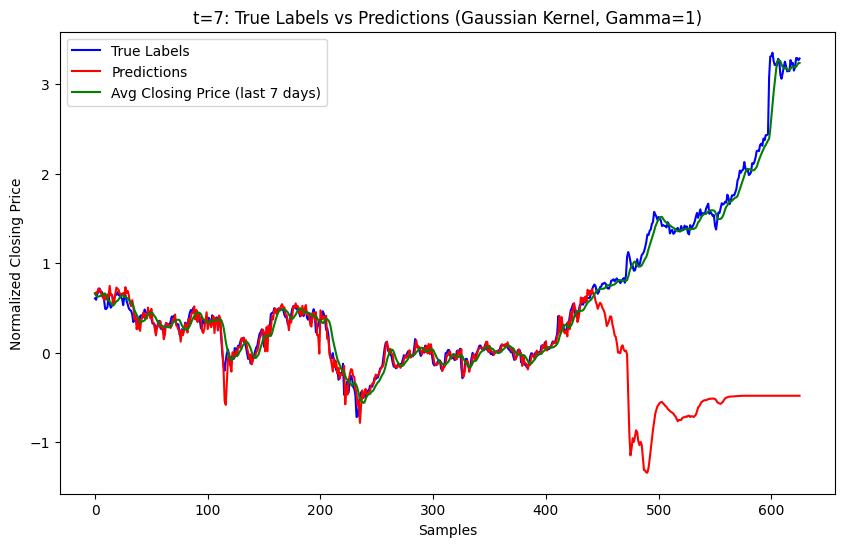

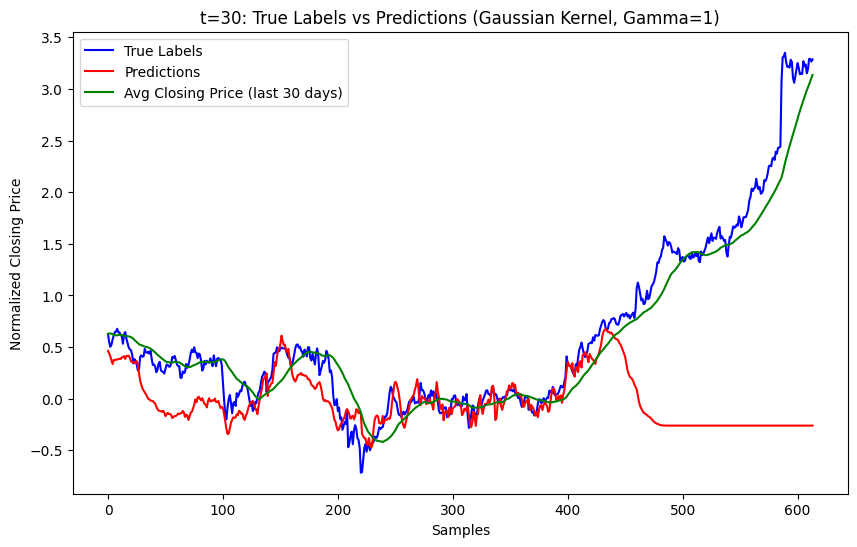

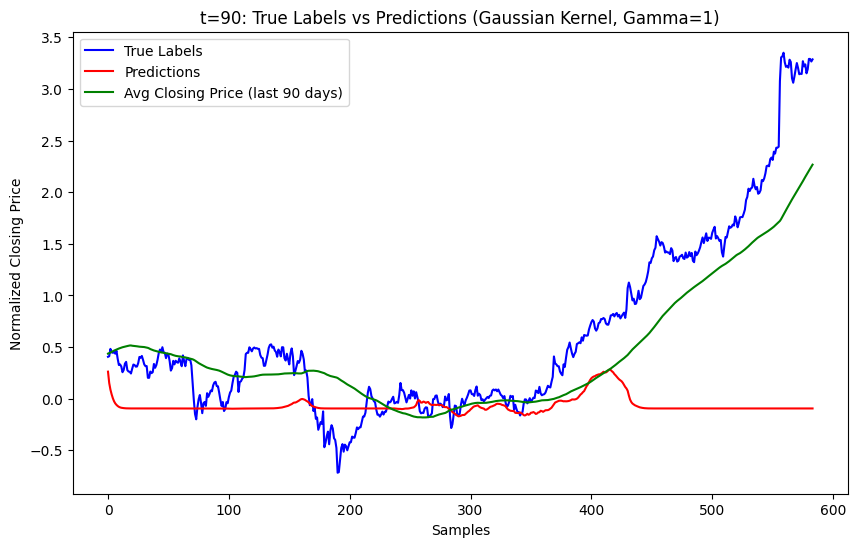

Gamma: 0.1


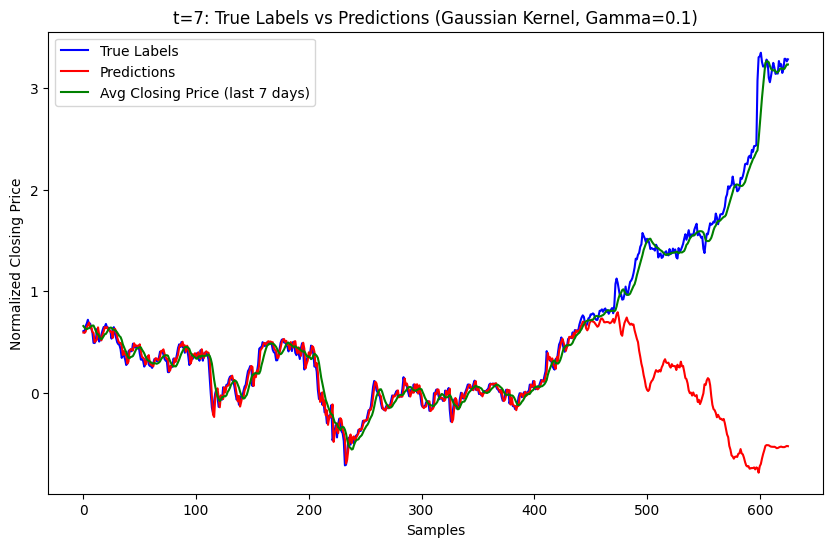

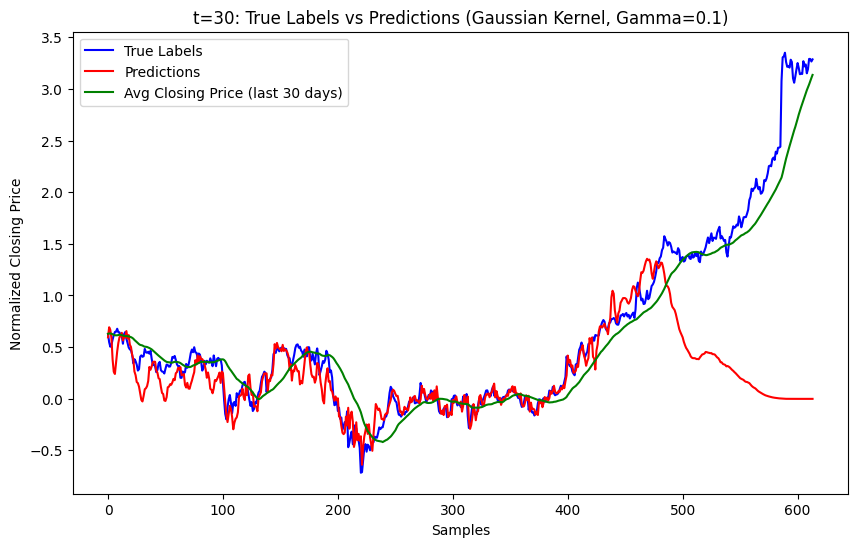

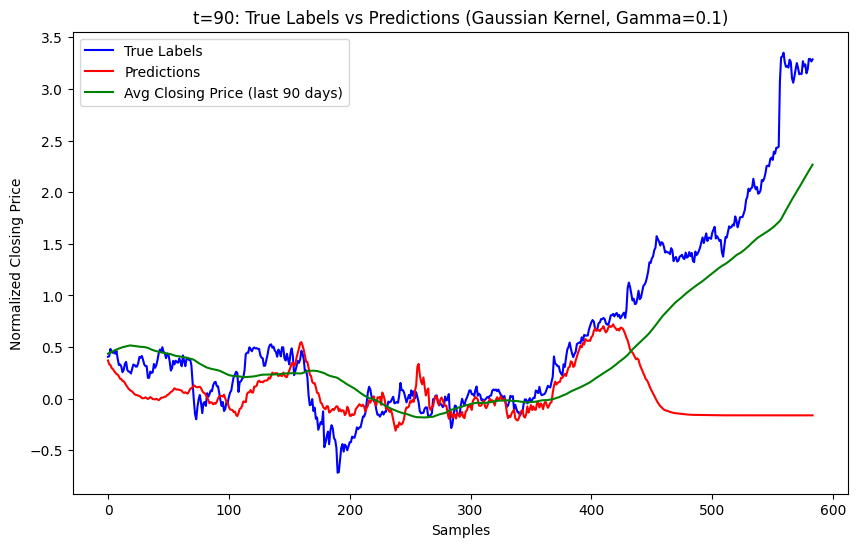

Gamma: 0.01


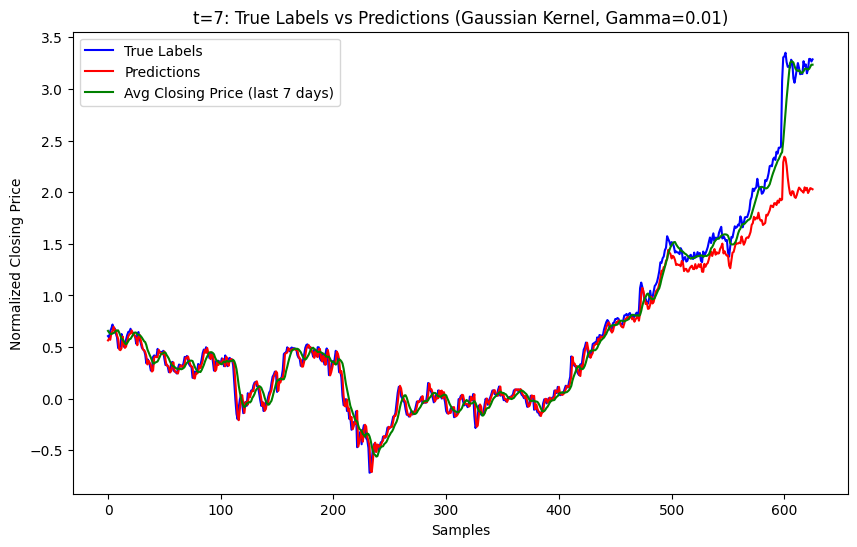

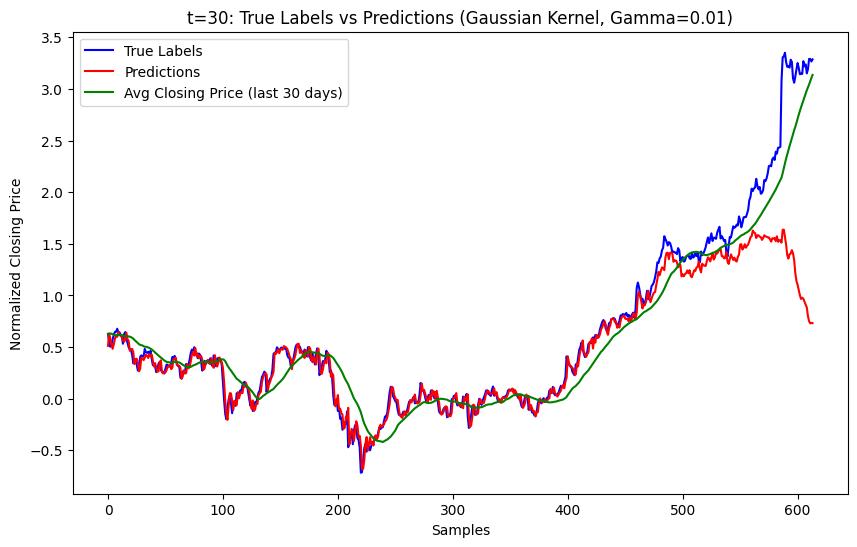

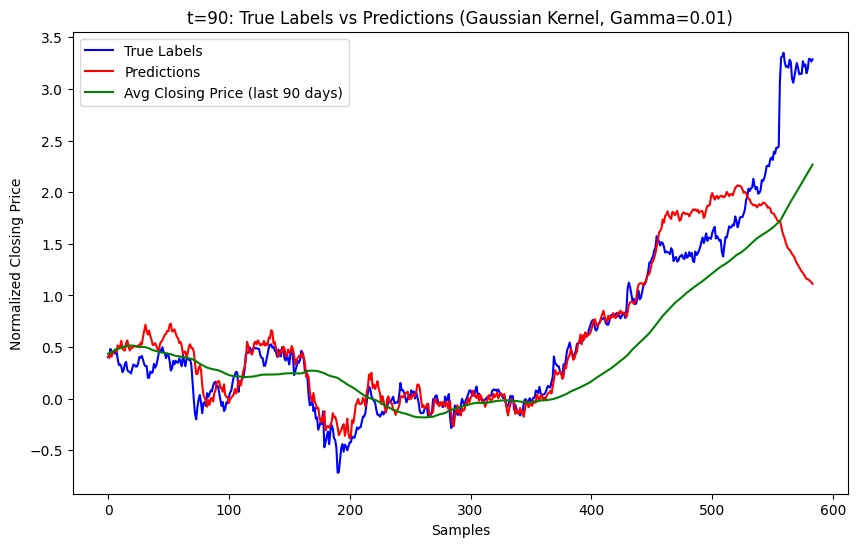

Gamma: 0.001


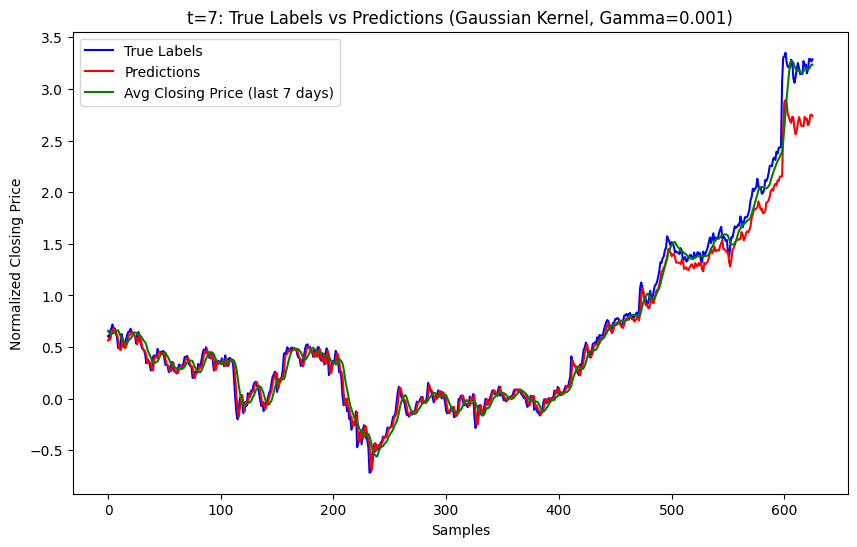

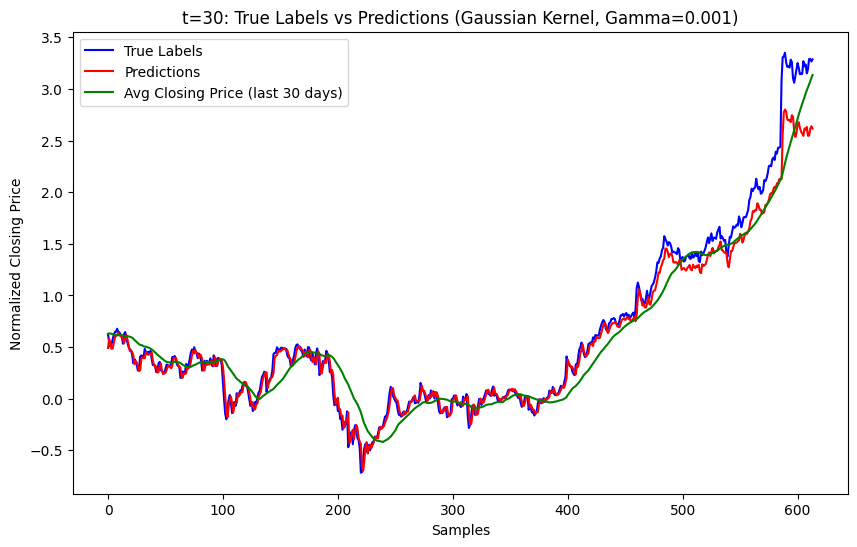

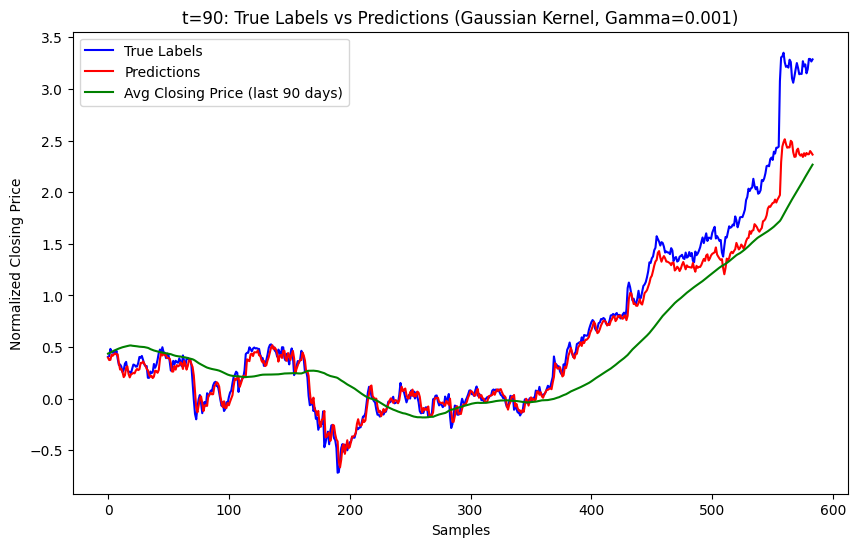

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(y_test, y_pred, X_test, t, gamma):

    plt.figure(figsize=(10, 6))
    
    # Plot true labels
    plt.plot(range(len(y_test)), y_test, label='True Labels', color='blue')

    # Plot predictions
    plt.plot(range(len(y_pred)), y_pred, label='Predictions', color='red')

    if X_test.shape[1] >= t:  # Ensure enough past data exists
        avg_closing_price = np.mean(X_test[:, -t:], axis=1)
        plt.plot(range(len(avg_closing_price)), avg_closing_price, label=f'Avg Closing Price (last {t} days)', color='green')

    plt.xlabel('Samples')
    plt.ylabel('Normalized Closing Price')
    plt.title(f"t={t}: True Labels vs Predictions (Gaussian Kernel, Gamma={gamma})")
    plt.legend()
    plt.show()

C = best_C
epsilon = best_epsilon

for gamma in gamma_values:
    print(f"Gamma: {gamma}")
    for i in range(len(t)):
        svr_dual_solution = solve_svr_dual(X_train_list[i], y_train_list[i], C = C, epsilon = epsilon, kernel = rbf_kernel, gamma = gamma)
        svr_dual_solutions.append(svr_dual_solution)

        α = np.array(svr_dual_solution['x']).flatten()
        
        n_samples = X_train_list[i].shape[0]

        α_plus = α[:n_samples]
        α_minus = α[n_samples:]
        
        α_diff = α_plus - α_minus
        
        train_features = X_train_list[i]
        train_labels = y_train_list[i]

        b = compute_gaussian_b(α_plus, α_minus, train_features, train_labels, gamma)
        
        y_pred_test = svm_gaussian_predictor(α_plus, α_minus, train_features, train_labels, b, gamma, X_test_list[i])
        y_pred_test = np.array(y_pred_test).flatten()
        
        mse = mean_squared_error(y_test_list[i], y_pred_test)
        epsilon_insensitive_loss_value = epsilon_insensitive_loss(y_test_list[i], y_pred_test, epsilon)
        plot_predictions(y_test_list[i], y_pred_test, X_test_list[i], t[i], gamma)
